In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [40]:
# kl_div = np.loadtxt("./Results/KL_Trend_Check_EXP/kl_diver.txt")

Thomas_lb = np.loadtxt("./Results/KL_Critical_Value_Check_EXP/0.4-0.5/CL_list.txt")
# Mean = np.loadtxt("./Results/KL_Trend_Check_EXP/GT.txt")
GT = np.loadtxt("./Results/KL_Critical_Value_Check_EXP/0.4-0.5/GT.txt")

In [36]:
d = {"Thomas_lb":Thomas_lb[:100],"Ground Truth":GT[:100]}
# data = np.array([kl_div_eb, kl_div_be, Thomas_lb, BS_lb, GT])
df = pd.DataFrame(data=d)
# df.sort_values(by="kl_div", ascending=True, inplace=True)

In [21]:
df["Thomas_error"] = abs(df["Thomas_lb"] - df["Ground Truth 90 lowerbound"])

In [22]:
df.to_csv("Test/results.csv", index=False)

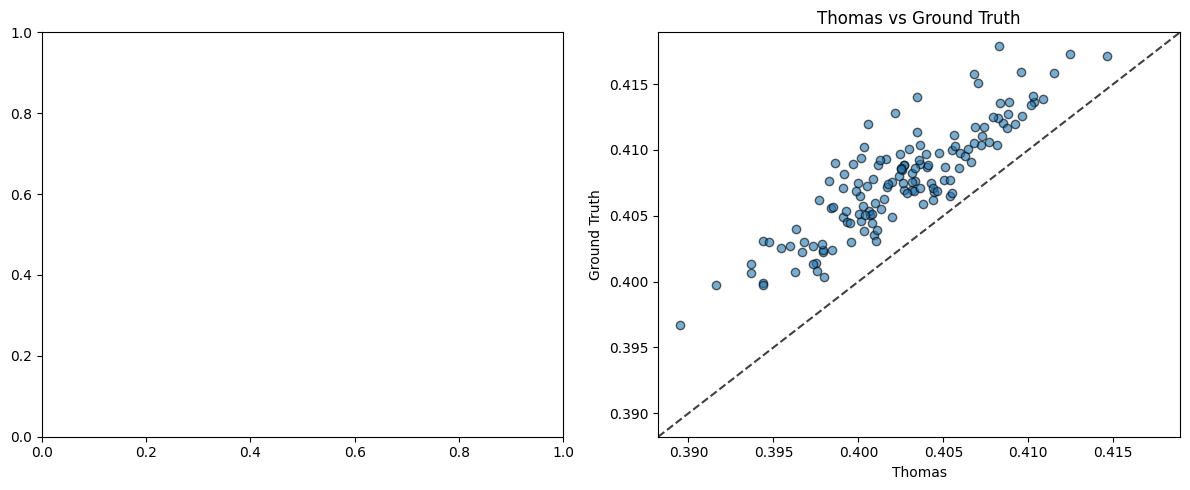

In [24]:
# Assign prettier colors based on KL divergence
# def assign_color(kl_val):
#     if kl_val < 0.2:
#         return "#377eb8"  # Red
#     elif kl_val <= 1.5:
#         return "#4daf4a"  # Green
#     else:
#         return "#e41a1c"  # Blue

# df["color"] = df["kl_div"].apply(assign_color)

# Scatter plot function with 45-degree line
def plot_scatter(ax, x, y, xlabel, ylabel, title):
    ax.scatter(x, y, edgecolors='k', alpha=0.6)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)  # 45-degree line
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# plot_scatter(axs[0], df["Thomas_lb"], df["Population Mean"], df["color"], "Thomas", "Population Mean", "Thomas vs Population Mean")
plot_scatter(axs[1], df["Thomas_lb"], df["Ground Truth"], "Thomas", "Ground Truth", "Thomas vs Ground Truth")

plt.tight_layout()
plt.show()


In [29]:
df

,kl_div,Thomas_lb,Population Mean,Ground Truth 90 lowerbound,Thomas_error,color
6,0.161553,0.400650,0.412776,0.412616,0.011966,#377eb8
57,0.178453,0.412911,0.420862,0.420703,0.007792,#377eb8
44,0.186154,0.397474,0.407974,0.407815,0.010341,#377eb8
63,0.205495,0.378846,0.403087,0.402929,0.024083,#4daf4a
62,0.209354,0.398535,0.407740,0.407578,0.009043,#4daf4a
...,...,...,...,...,...,...
53,inf,0.204873,0.426970,0.426807,0.221934,#e41a1c
59,inf,0.348373,0.419593,0.419433,0.071060,#e41a1c
72,inf,0.256118,0.393495,0.393340,0.137222,#e41a1c
85,inf,0.268228,0.421020,0.420857,0.152629,#e41a1c


In [27]:
import torch
import numpy as np

def mape(y_true, y_pred):
    # Convert to numpy if inputs are PyTorch tensors
    if isinstance(y_true, torch.Tensor):
        y_true = y_true.detach().cpu().numpy()
    if isinstance(y_pred, torch.Tensor):
        y_pred = y_pred.detach().cpu().numpy()

    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    # Avoid division by zero
    epsilon = 1e-8
    mask = np.abs(y_true) > epsilon
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100


In [ ]:
import matplotlib.pyplot as plt

# Example: several lists of numerical data
data1 = [0.2, 0.3, 0.25, 0.4, 0.35]
data2 = [0.5, 0.55, 0.52, 0.6, 0.58]
data3 = [0.1, 0.15, 0.12, 0.18, 0.2]

# Combine into one list of lists
data = [data1, data2, data3]

# Boxplot
plt.figure(figsize=(6, 5))
plt.boxplot(data, patch_artist=True)
plt.xticks([1, 2, 3], ['List 1', 'List 2', 'List 3'])  # optional custom labels
plt.ylabel("Value")
plt.title("Boxplot of Multiple Data Lists")
plt.grid(True)
plt.tight_layout()
plt.show()


In [41]:
print("MAPE:", mape(GT[:100], Thomas_lb[:100]), "%")

MAPE: 7.995623960211021 %
